<a href="https://colab.research.google.com/github/zetta-health/exp-curso-python-saude/blob/master/PySaude_03_python_analise_exploratoria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a href="https://www.linkedin.com/company/zetta-health-analytics/" align="center"><img src="https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/assets/zetta-exp-logo.jpg" width="400" align="center"></a>

# **Análise exploratória de dados**

Já vencemos as etapas de conhecer e usar Colab do Google, Markdown e das noções introdutórias do Python. Parabéns!

Agora é a hora de trabalharmos com dados reais da saúde suplementar! Fantástico, não? O banco de dados que iremos trabalhar é de uma amostra de 300 beneficiários (quem tem plano de saúde). Os dados aqui tem propósito de estudo e não devem ser usados para pesquisa.

As 74 colunas possuem informações a respeito do uso de plano (custo e frequência) de 12 meses anteriores e posteriores a resposta de um questionário de auto-avaliação de risco e problemas de saúde. Cada linha representa um beneficiário.

O dicionário da base de dados pode ser acessado neste [link](https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/data_dictionary.md). Vamos discutir mais sobre o banco de dados ao longo deste notebook.

Ao trabalho!


## **1.Abrir banco de dados e avaliar estrutura**

In [ ]:
# Carregar bibliotecas para análise de dados
import pandas as pd # Pandas
import numpy as np  # Numpy

In [ ]:
# Abrir banco de dados
url = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/sample_data.csv'
data = pd.read_csv(url)

In [ ]:
# Verificar os primeiros casos
# do banco de dados
data.head()

,id,type,before.hra.12m.claims.total,before.hra.12m.elective.encounter.cost,before.hra.12m.elective.encounter.event,before.hra.12m.er.cost,before.hra.12m.er.event,before.hra.12m.exams.cost,before.hra.12m.exams.event,before.hra.12m.hospital.cost,...,beans.iron.risk,fruits.veggies,snacks,sugar.sweets,Integral.milk.risk,red.meat.risk,snack.time.risk,salt.risk,disease.risk.aggregated,total.risk
0,1,0,76.16,0.0,0,76.16,1,0.00,0,0,...,0,1,0,1,1,1,0,0,1,7
1,2,0,0.00,0.0,0,0.00,0,0.00,0,0,...,0,1,0,0,0,0,0,0,1,5
2,3,0,2668.70,377.4,5,551.61,2,1187.06,44,0,...,0,1,0,0,1,0,0,0,0,3
3,4,0,605.97,228.3,3,0.00,0,303.74,9,0,...,0,1,0,0,0,0,0,0,1,3
4,5,0,226.90,72.2,1,103.13,1,51.57,3,0,...,0,1,1,1,1,0,1,0,1,7


In [ ]:
# Obter informações sobre os tipos de variáveis
# do banco de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       300 non-null    int64  
 1   type                                     300 non-null    int64  
 2   before.hra.12m.claims.total              300 non-null    float64
 3   before.hra.12m.elective.encounter.cost   300 non-null    float64
 4   before.hra.12m.elective.encounter.event  300 non-null    int64  
 5   before.hra.12m.er.cost                   300 non-null    float64
 6   before.hra.12m.er.event                  300 non-null    int64  
 7   before.hra.12m.exams.cost                300 non-null    float64
 8   before.hra.12m.exams.event               300 non-null    int64  
 9   before.hra.12m.hospital.cost             300 non-null    int64  
 10  before.hra.12m.hospital.events           300 non-n

## **2.Validação dos dados**

Antes de qualquer análise de dados, precisamos validar a integridade dos dados que recebemos. Esta é uma etapa crucial e precisa sempre ser feita de acordo com manuais de boas práticas. A dura experiência nos mostrou isso também.

Como fazer o teste? Verifique se seus dados possuem respostas faltantes, se as colunas estão com os tipos de dados adequados. Nós não esgotaremos os testes aqui, mas recomendamos que os dados sejam validados por inúmeros testes e que uma crítica dos dados seja entregue junto com os resultados das análises.

In [ ]:
# Validação:

# Teste dos dados 1. Verificar se as variáveis de custo separadas por 
# CETIPO estão somadas corretamente na variável 'before.hra.12m.claims.total'
# C - Consultas      - before.hra.12m.elective.encounter.cost
# E - Exames         - before.hra.12m.exams.cost
# T - Terapias       - before.hra.12m.er.cost
# I - Internação     - before.hra.12m.hospital.cost
# P - Procedimentos  - Não foi registrado na base.
# O - Outros         - before.hra.12m.outpatient.cost 

(data.filter(regex=("before.*cost")).sum(axis=1) - data['before.hra.12m.claims.total']).describe()

count    300.000000
mean      -0.011167
std        0.100252
min       -0.470000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.500000
dtype: float64

**Conclusões**: A diferença entre a coluna com a soma das variáveis com de custo anteriores a entrevista de avaliação de risco é mínima. Muito provavelmente ligada a forma com que os arredondamentos foram trabalhados no programa do analista (não vamos condená-lo por usar o Excel) e no Python. 

In [ ]:
# Teste dos dados 2. Verificar se as variáveis de custo separadas por 
# CETIPO estão somadas corretamente na variável 'after.hra.12m.claims.total'
# C - Consultas      - after.hra.12m.elective.encounter.cost
# E - Exames         - after.hra.12m.exams.cost
# T - Terapias       - after.hra.12m.er.cost
# I - Internação     - after.hra.12m.hospital.cost
# P - Procedimentos  - Não foi registrado na base.
# O - Outros         - after.hra.12m.outpatient.cost 

# Agora é com você. Verifique se a soma está correta e defina quais serão 
# os próximos passos da análise

# Seu código aqui:

**Clique aqui para ver a resposta**

<!-- 
```python
(data.filter(regex=("after.*.cost")).sum(axis=1) - data['after.hra.12m.claims.total']).describe()
```
Alguma coisa está errada porque a diferença das duas colunas está longe de ser zero. Se inspecionarmos a coluna 'after.hra.12m.claims.total', verificaremos que  todos os valores estão zerados. Erro do planilheiro do Excel.

```python
data['after.hra.12m.claims.total']).describe()
```

Assim, precisaremos criar uma nova variável no banco com os valores corretos.

```
data['after.hra.12m.claims.total.r'] = data.filter(regex=("after.*.cost")).sum(axis=1)
```
-->

## **3.Níveis de medida**

## Escalas de medida não-métrica

Medidas que descrevem diferenças em tipo ou natureza, indicando a presença ou ausência de uma característica ou propriedade.

O analista não pode realizar nenhuma operação aritmética (somas, médias, multiplicações, divisões etc.), tornando assim todos os dados não-métricos bastante limitados em seu uso na estimação de coeficientes do modelo. 

### Escalas nominais

Uma escala nominal designa números para rotular ou identificar indivíduos ou objetos.

Dados nominais representam somente categorias ou classes, e não implicam quantias de um atributo ou característica. Exemplos frequentemente usados de dados nominalmente escalonados incluem diversos **atributos demográficos (como sexo, religião, ocupação ou filiação partidária)**, muitas formas de comportamento (como comportamento de voto ou atividade de compra), **ou qualquer outra ação que seja discreta (que acontece ou não)**.

### Escalas ordinais

Escalas ordinais são o próximo nível “superior” de precisão em medida. No caso de escalas ordinais, variáveis **podem ser ordenadas ou ranqueadas** em relação à quantia do atributo possuída. Todo **indivíduo ou objeto pode ser comparado com outro em termos de uma relação da forma “maior que” ou “menor que”**. Os números empregados em escalas ordinais, contudo, são realmente não-quantitativos porque eles indicam apenas posições relativas em uma série ordenada. **Escalas ordinais não fornecem qualquer medida da quantia ou magnitude real em termos absolutos**, mas apenas a ordem dos valores. O pesquisador conhece a ordem, mas não a quantia de diferença entre os valores.

<br>
<br>
<hr>

## **4.Plano de análise**

Toda análise exploratória precisa começar com algumas perguntas que podem ser respondidas pelos dados.

### Descrição dos dados sociodemográficos
Primeiro, iremos descrever o perfil de nossa amostra com as seguintes perguntas:

1. Qual a distribuição de sexo (variável 'gender') da amostra?
2. Qual a distribuição de idade (variável 'age') da amostra?
3. Qual a distribuição do tipo de beneficiário (variável 'type') na amostra?
4. Qual o nível socioeducacional dos participantes da amostra (variável 'educational.level')?

Fique a vontade para explorar os dados também.




**01. Qual a distribuição de sexo (variável 'gender') da amostra?**

In [ ]:
# 1.a Qual a distribuição de sexo (variável 'gender') da amostra?

# Antes de fazer a conta, vamos mapear e recodificar as variáveis para
# facilitar a interpretação da tabela.
data['gender_r'] = data['gender'].map({0: 'female', 1: 'male'})
data['gender_r'].value_counts()

female    223
male       77
Name: gender_r, dtype: int64

In [ ]:
# 1.b Que tal calcular as porcentagens em vez dos números brutos?

# Simples, é só usar o parâmetro 'normalize' do método value_counts()
data['gender_r'].value_counts(normalize=True)

female    0.743333
male      0.256667
Name: gender_r, dtype: float64

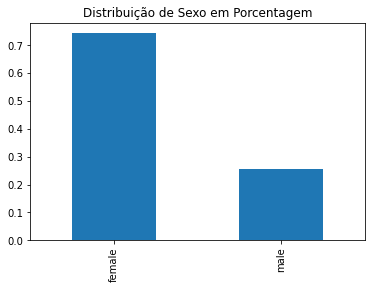

In [ ]:
# Podemos visualizar melhor essa distribuição em um gráfico de barras.
import matplotlib.pyplot as plt

# Com o parâmetro 'kind' da função plot() você define o tipo do gráfico.
data['gender_r'].value_counts(normalize=True).plot(kind='bar')

plt.title('Distribuição de Sexo em Porcentagem')
plt.show()

### **A. Descrição das características de saúde**

1. Quantas pessoas não fizeram uso do plano de saúde nos 12 meses que antecederam a pesquisa?
2. Existem diferenças em condições de saúde (variáveis entre 'asthma.bronquitis.emphysema' e 'hiv') na vida entre aqueles que usaram o plano de saúde e aqueles que não fizeram uso do plano de saúde nos 12 meses que antecederam a pesquisa?  
    a. Criar uma variável (coluna) para classificar pessoas que não fizeram uso do plano de saúde nos 12 meses que antecederam a pesquisa.  
    b. Avaliar a diferença para uma condição de saúde 'asthma.bronquitis.emphysema'  
  c. Fazer para todas as variáveis entre 'asthma.bronquitis.emphysema' e 'hiv'



**01. Quantas pessoas não fizeram uso do plano de saúde nos 12 meses que antecederam a pesquisa?**

In [ ]:
data['has_used_prior_ha'] = np.where(data['before.hra.12m.claims.total'] > 0,
                                     'Yes', 'No')
                                     
data['has_used_prior_ha'].value_counts()

Yes    249
No      51
Name: has_used_prior_ha, dtype: int64

**02. Existem diferenças em condições de saúde (variáveis entre 'asthma.bronquitis.emphysema' e 'hiv') na vida entre aqueles que usaram o plano de saúde e aqueles que não fizeram uso do plano de saúde nos 12 meses que antecederam a pesquisa?** 

In [ ]:
# 2a.  Resolvido na célula de código acima. :)
# 2b.  Avaliar 'asthma.bronquitis.emphysema'
# 2b1. Tabela de frequência
pd.crosstab(data['asthma.bronquitis.emphysema'], data['has_used_prior_ha'])

has_used_prior_ha,No,Yes
asthma.bronquitis.emphysema,,
0,43,228
1,8,21


In [ ]:
# 2b2. Tabela de frequência com porcentagens
pd.crosstab(data['asthma.bronquitis.emphysema'], data['has_used_prior_ha'],  
            normalize='columns').round(3) * 100

has_used_prior_ha,No,Yes
asthma.bronquitis.emphysema,,
0,84.3,91.6
1,15.7,8.4


Esta última letra é a mais repetitiva de todas. Você poderia repetir os passos acima para todas as variáveis. Repetir tem dois pontos negativos: repetição de código e tamanho do notebook.

De maneira geral, toda vez que você começar a repetir um código de análise, pense se seria melhor usar seus superpoderes de programação já aprendidos. 

É uma ótima hora para colocar à prova nossos nossos conhecimentos de python. Vamos lá!

In [ ]:
# 2.. Combinar Múltiplas tabelas
# Primeiro, vamos criar uma função que retorna um dicionário com algumas
# informações da função crosstab do pandas. Depois iremos combiná-las 
# em num dicionário que possui o nome da coluna, informações em números
# absolutos e percentagens combinadas. Caso não exista nenhuma pessoa por
# condição de saúde iremos retornar um dicionário com 0 casos.

def create_table_row(col_name):
  # Criar tabelas de frequência e percentagens para uma dada 
  # coluna 'col_name'.
  table_freq = pd.crosstab(data[col_name], data['has_used_prior_ha'])
  table_perc = pd.crosstab(data[col_name], data['has_used_prior_ha'],  
                          normalize='columns').round(3) * 100
  try:
    # Selecionar trechos das tabelas e combiná-los no dicionário.
    my_dict = {'condicao_de_saude': col_name + ' [Yes]', 
              'usou_plano': str(table_perc.T.loc['Yes'][1].round(1)) + 
              ' (' + str(table_freq.T.loc['Yes'][1]) + ')',
              'nao_usou_plano': str(table_perc.T.loc['No'][1].round(1)) + 
              ' (' + str(table_freq.T.loc['No'][1]) + ')'}
  except:
    # Se os trechos tiverem zero, retornar dicionário com zero.
    my_dict = {'condicao_de_saude': col_name + ' [Yes]', 
              'usou_plano': str(0),
              'nao_usou_plano': str(0)}
  
  return my_dict

# Testar para uma condição de saúde
create_table_row('asthma.bronquitis.emphysema')

{'condicao_de_saude': 'asthma.bronquitis.emphysema [Yes]',
 'usou_plano': '8.4 (21)',
 'nao_usou_plano': '15.7 (8)'}

Wow! Criamos uma função que retorna um dicionário para uma dada coluna do banco de dados (DataFrame do pandas). Hora de fazer para todas colunas de uma vez usando um loop.

In [ ]:
# Primeiro vamos criar uma lista vazia e adicionar os dicionários com valores 
# para cada coluna usando as colunas. As colunas sobre presença de risco estão
# entre os índices 30 a 56. Como os slices no python são não inclusivos, 
# iremos até 57.
list_of_rows = []                                   # 1.Cria lista vazia
for row in data.columns[30:57]:                     # 2.Cria iteração para colunas
  list_of_rows.append(create_table_row(row))        # 3.Adiciona dicionário à lista
final_df = pd.DataFrame(list_of_rows)               # 4.Converte lista de dicionários
final_df                                            #   em lista.

,condicao_de_saude,usou_plano,nao_usou_plano
0,asthma.bronquitis.emphysema [Yes],8.4 (21),15.7 (8)
1,allergies [Yes],15.7 (39),17.6 (9)
2,migraine.headache [Yes],26.1 (65),29.4 (15)
3,insomnia [Yes],8.4 (21),9.8 (5)
4,rhinitis.sinusitis [Yes],45.4 (113),31.4 (16)
5,colestherol [Yes],7.2 (18),11.8 (6)
6,dyslipidemia [Yes],0.4 (1),0.0 (0)
7,diabetes [Yes],1.2 (3),5.9 (3)
8,thyroid [Yes],5.6 (14),3.9 (2)
9,hepatitis [Yes],0,0


**Interpretação** 

Percebemos que algumas condições de saúde são inexistentes entre os beneficiários (e.g., câncer, hiv, derrrame [stroke]). Podemos também usar
as informações acima para testar nosso conhecimento sobre saúde.

Esperaríamos beneficiários com doenças usando mais o plano de saúde. Enquanto isso é verdade para quem tem sinusite, 45,4% (113) usaram o plano e 31.4% (16) não usaram, isso não é verdade diabetes, 1,2% (3) usaram o plano e 5,9% (3). Qual seria uma explicação para isso? 

Talvez porque as frequências são muito pequenas. Poderíamos comparar usando estatística inferencial qual a probabilidade destes números serem encontrados por acaso. Para quem quiser saber mais, o teste do qui-quadrado poderia usado nesta situação. [Documentação aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html). 

### **B.Descrição dos custos em saúde (sinistro)**

1. Criar um banco somente com beneficiários que usaram o plano de saúde da base de dados nos 12 meses anteriores à pesquisa
2. Fazer uma matriz de correlação entre as variáveis de custo antes e depois;
3. Gerar um heatmap das correlações;
4. Transformar usando log as variáveis de custo total antes e depois. Após, aplicar uma correlação de Pearson.

**1.Criar um banco somente com beneficiários que usaram o plano de saúde da base de dados nos 12 meses anteriores à pesquisa**

In [ ]:
# Seu código aqui:
# Dica: use a variável 'has_used_prior_ha'

**Clique aqui para ver a resposta**
<!--
data_b = data[data['has_used_prior_ha'] == 'Yes']
-->

**2.Fazer uma matriz de correlação entre as variáveis de custo antes e depois**


In [ ]:
# Dica: A resposta para esta pergunta depende do exercício 1 acima.
# Dica: Use a função 'filter' do pandas para selecionar as variáveis
# Seu código aqui:
correlations = data_b.filter(regex='before.hra.*.cost').corr(method='spearman').round(2)
correlations

,before.hra.12m.elective.encounter.cost,before.hra.12m.er.cost,before.hra.12m.exams.cost,before.hra.12m.hospital.cost,before.hra.12m.outpatient.cost
before.hra.12m.elective.encounter.cost,1.00,0.13,0.66,0.32,0.42
before.hra.12m.er.cost,0.13,1.00,0.17,0.19,0.28
before.hra.12m.exams.cost,0.66,0.17,1.00,0.23,0.44
before.hra.12m.hospital.cost,0.32,0.19,0.23,1.00,0.21
before.hra.12m.outpatient.cost,0.42,0.28,0.44,0.21,1.00


**3. Gerar um heatmap das correlações**

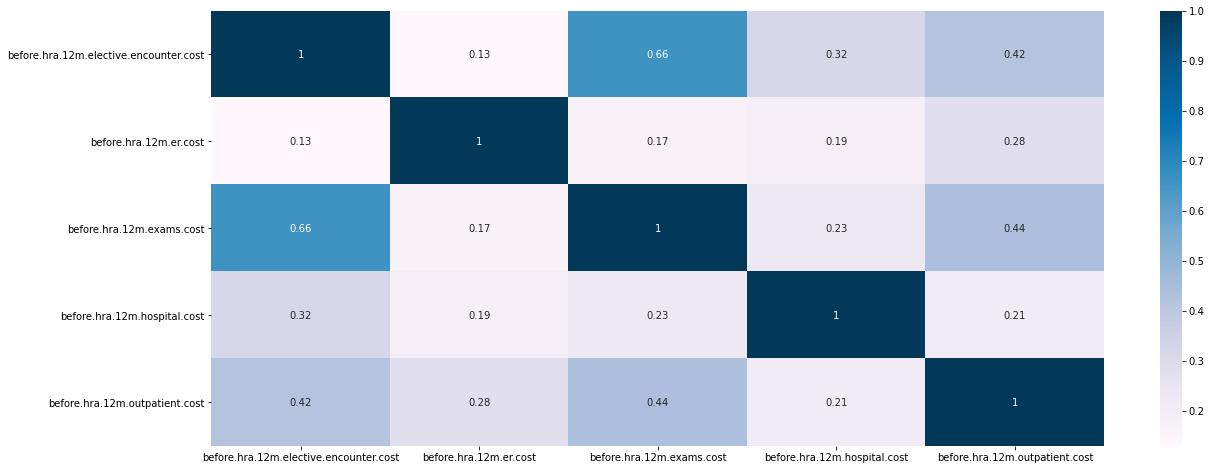

In [ ]:
# Já temos uma ideia das associações. No entanto, existe uma forma melhor
# de visualizar uma matriz de correlação usando o pandas.

import seaborn as sns
plt.figure(figsize=(20, 8))
sns.heatmap(correlations, 
        xticklabels=correlations.columns,
        yticklabels=correlations.columns,
        annot=True,
        cmap="PuBu")

**4. Transformar usando log as variáveis de custo total antes e depois. Após, aplicar uma correlação de Pearson.**

Os dados de sinistro em planos de saúde tendem a seguir uma distribuição não paramétrica (são assimétricas e desviam de uma distribuição gaussiana). Isto é um desafio para o emprego de muitos testes estatísticos e modelos de aprendizagem de máquina. 

Usamos uma abordagem de cálculo das correlações já assumindo esta distribuição acima. Em vez de usarmos o cálculo de correlação de Pearson (usada para testes paramétricos), usamos a de Spearman.

Como podemos contornar este tipo de situação? Existem diversas maneiras. Vamos começar explorando nosso problema.

Para isso, iremos:

1. Comparar uma distribuição normal contra a dos nossos dados usando dois métodos gráficos;
2. Tentar resolver o problema, transformando nossos dados com uma função matemática.

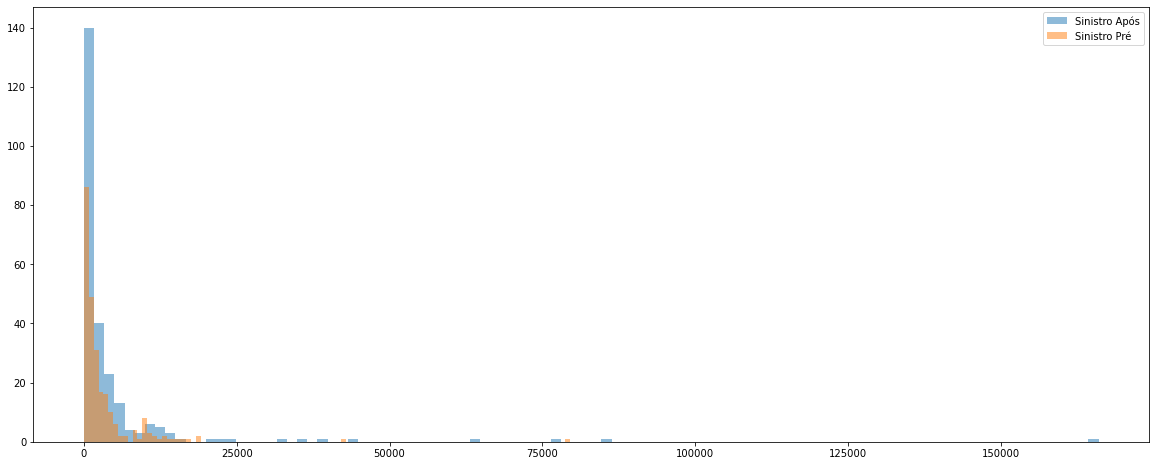

In [ ]:
# Histograma das variáveis de custo antes e depois.
from matplotlib import pyplot
#bins = np.linspace(-10,10,100)
plt.figure(figsize=(20, 8))
pyplot.hist(data_b['after.hra.12m.claims.total.r'], bins=100, alpha=.5, label='Sinistro Após')
pyplot.hist(data_b['before.hra.12m.claims.total'], bins=100, alpha=.5, label='Sinistro Pré')
pyplot.legend(loc='upper right')
pyplot.show()

Até aqui já podemos suspeitar que a distribuição não é simétrica, tampouco paramétrica. Podemos simular o que seria uma distribuição normal com a mesma média e desvio padrão de nossos dados e comparar os resultados. Vejamos.

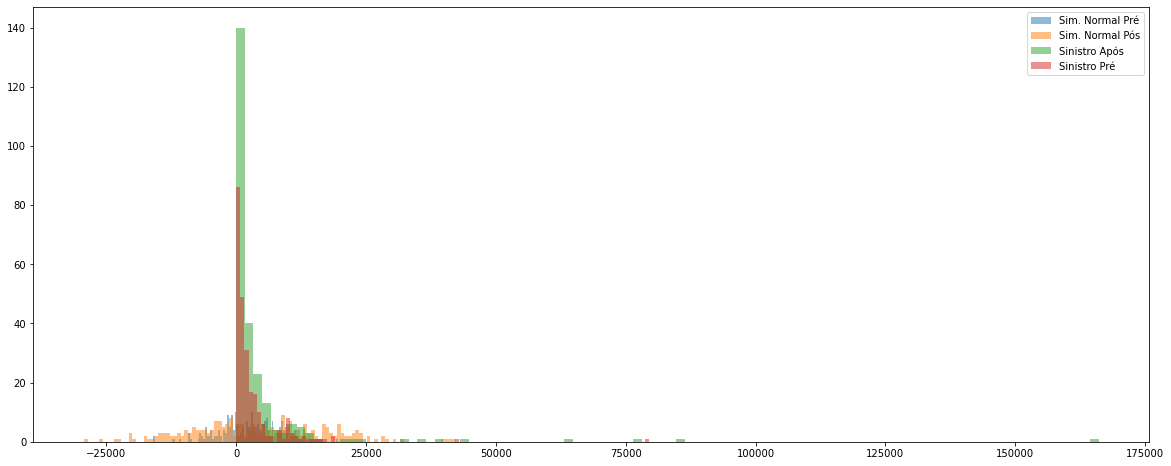

In [ ]:
import random
# Simular distribuições usando biblioteca random
normal_pos = [random.gauss(data_b['after.hra.12m.claims.total.r'].mean(), 
                           data_b['after.hra.12m.claims.total.r'].std()) for 
              _ in range(data_b.shape[0])]

normal_pre = [random.gauss(data_b['before.hra.12m.claims.total'].mean(), 
                           data_b['before.hra.12m.claims.total'].std()) for 
              _ in range(data_b.shape[0])]

# Criar histograma
plt.figure(figsize=(20, 8))
pyplot.hist(normal_pre, bins=100, alpha=.5, label='Sim. Normal Pré')
pyplot.hist(normal_pos, bins=100, alpha=.5, label='Sim. Normal Pós')
pyplot.hist(data_b['after.hra.12m.claims.total.r'], bins=100, alpha=.5, label='Sinistro Após')
pyplot.hist(data_b['before.hra.12m.claims.total'], bins=100, alpha=.5, label='Sinistro Pré')
pyplot.legend(loc='upper right')
pyplot.show()

Wow! A distribuição de sinistro não são paramétricas em nenhum lugar do universo. Não temos sinistro negativo e as distribuições flutuam muito mais em valores do que teríamos. 

Vamos ainda tentar verificar o grau de associação entre as duas variáveis usando o gráfico de dispersão.

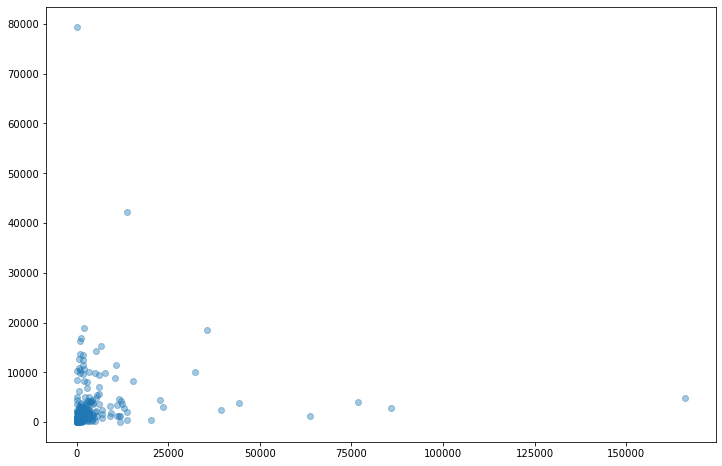

In [ ]:
# Diagrama de dispersão
plt.figure(figsize=(12, 8))
pyplot.scatter(x=data_b['after.hra.12m.claims.total.r'],
               y=data_b['before.hra.12m.claims.total'],
               alpha=0.4)
pyplot.show()

Temos muito casos extremos. Vamos tentar plotar a região mais densa do gráfico
para tentarmos buscar uma associação entre sinistro antes e depois da avaliação de risco.

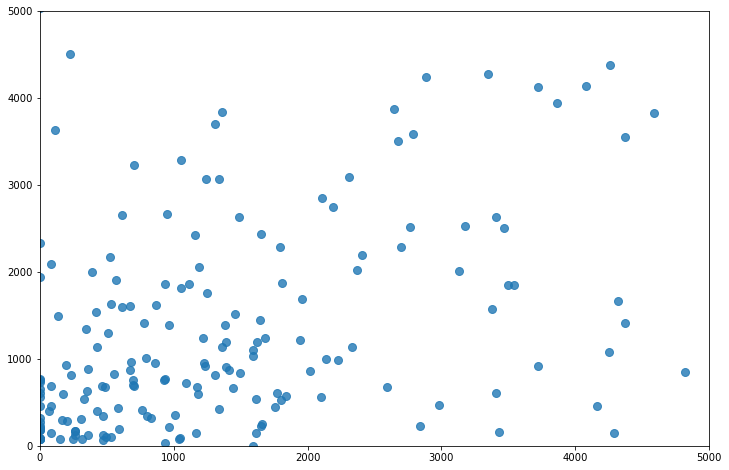

In [ ]:
# Diagrama de dispersão entre sinistros com limites para eixos x e y
plt.figure(figsize=(12, 8))
pyplot.scatter(x=data_b['after.hra.12m.claims.total.r'],
               y=data_b['before.hra.12m.claims.total'],
               alpha=0.8,
               s=64)
pyplot.xlim((0,5000))
pyplot.ylim((0,5000))
pyplot.show()

Para terminar, vamos usar o índice de correlação de Spearman para as duas variáveis.

In [ ]:
data_b[['before.hra.12m.claims.total', 
        'after.hra.12m.claims.total.r',]].corr(method='spearman').round(2)

,before.hra.12m.claims.total,after.hra.12m.claims.total.r
before.hra.12m.claims.total,1.00,0.46
after.hra.12m.claims.total.r,0.46,1.00


Temos uma associação moderada (0.46), o que intuitivamente faz sentido. Gastos 
dos beneficiários dos 12 meses anteriores estão associados com os 12 meses
posteriores a entrevista de saúde.

Para terminar esta última parte, iremos converter as variáveis na escala log normal para ver o que acontece com nossa distribuição dos dados.

/home/day0/.local/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


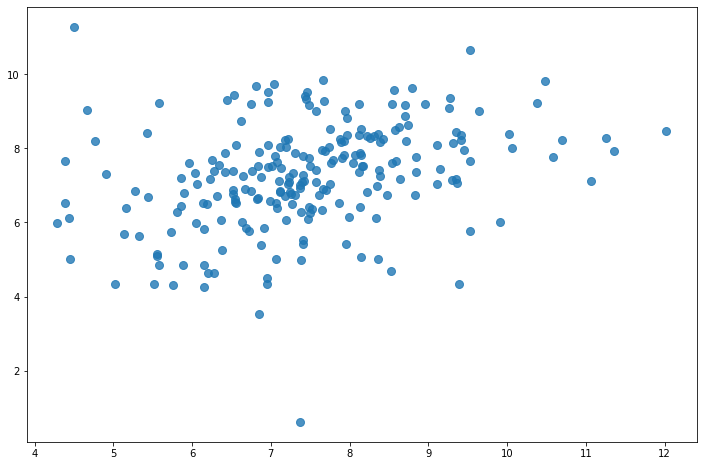

In [ ]:
#  
plt.figure(figsize=(12, 8))
pyplot.scatter(x=np.log(data_b['after.hra.12m.claims.total.r']),
               y=np.log(data_b['before.hra.12m.claims.total']),
               alpha=0.8,
               s=64)

### **C.Regressão linear múltipla (sinistro)**

In [37]:
data_b.head()

,id,type,before.hra.12m.claims.total,before.hra.12m.elective.encounter.cost,before.hra.12m.elective.encounter.event,before.hra.12m.er.cost,before.hra.12m.er.event,before.hra.12m.exams.cost,before.hra.12m.exams.event,before.hra.12m.hospital.cost,...,sugar.sweets,Integral.milk.risk,red.meat.risk,snack.time.risk,salt.risk,disease.risk.aggregated,total.risk,gender_r,has_used_prior_ha,after.hra.12m.claims.total.r
0,1,0,76.16,0.0,0,76.16,1,0.00,0,0,...,1,1,1,0,0,1,7,male,Yes,0.00
2,3,0,2668.70,377.4,5,551.61,2,1187.06,44,0,...,0,1,0,0,0,0,3,female,Yes,947.32
3,4,0,605.97,228.3,3,0.00,0,303.74,9,0,...,0,0,0,0,0,1,3,female,Yes,1773.81
4,5,0,226.90,72.2,1,103.13,1,51.57,3,0,...,1,1,0,1,0,1,7,female,Yes,1648.92
5,6,0,962.81,228.3,3,0.00,0,734.51,6,0,...,0,0,0,0,0,1,8,male,Yes,682.87


Utilizaremos a biblioteca de machine learning [scikit-learn](https://scikit-learn.org/stable/) para fazer o modelo:

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # inincializar o objeto do modelo linear

Vamos selecionar as variáveis e dar uma olhada na sua distribuição

In [ ]:
X = data_b.filter(regex='before.*cost').copy(deep=True) # Selecionar as variáveis de custo anterior
y = data_b['after.hra.12m.claims.total.r']  # Selecionar o custo após

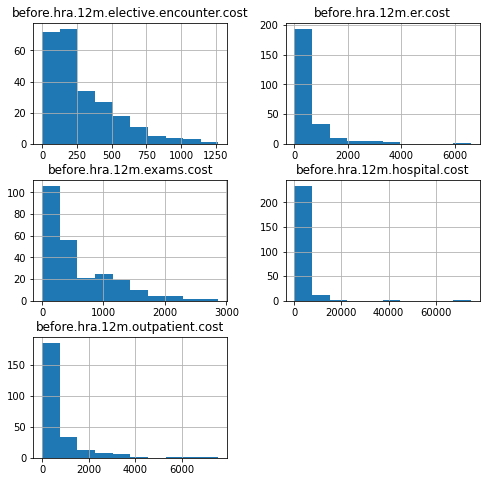

In [30]:
X.hist(figsize=(8, 8)) # Plotar histograma para as variáveis
plt.show()

Precisamos convertê-las para log

In [ ]:
for col in X.columns.values:
    X[col] = np.log(X[col] + 1)

y = np.log(y + 1)

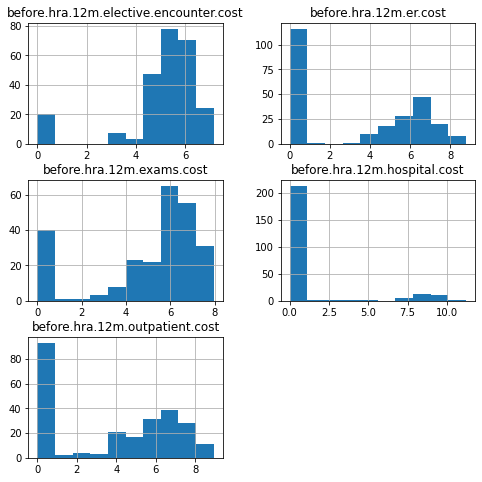

In [32]:
X.hist(figsize=(8, 8))
plt.show()

Agora podemos ajustar o modelo e ver seus coeficientes, baseando se nas variáveis de custo dos 12 meses anteriores (que acabamos de transformar em log) para tentar prever o custo dos 12 meses após.

In [ ]:
lm.fit(X, y)          # Ajustar o modelo

yhat = lm.predict(X)  # Gerar predições para avaliarmos o desempenho

print(f'Intercept: {lm.intercept_:.2f}')
for col, coef in zip(X.columns.values, lm.coef_):
    print(f'{coef:>.2f}: ', end='')
    print(f'{col}')

Intercept: 4.56
0.04: before.hra.12m.elective.encounter.cost
0.17: before.hra.12m.er.cost
0.18: before.hra.12m.exams.cost
0.02: before.hra.12m.hospital.cost
0.15: before.hra.12m.outpatient.cost


In [ ]:
print(f'R²: {lm.score(X, y):.2f}')

R²: 0.18


Vamos visualizar os valores reais e as predições do modelo.

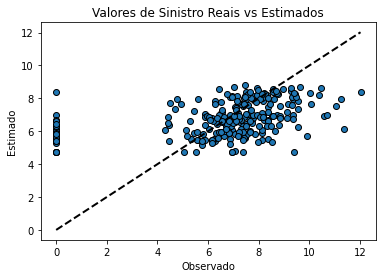

In [36]:
fig, ax = plt.subplots()
ax.scatter(y, yhat, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Observado')
ax.set_ylabel('Estimado')
ax.set_title('Valores de Sinistro Reais vs Estimados')
plt.show()
plt.close()

# **Yey! Parabéns por ter completado este notebook!**


Este notebook faz parte do curso de *Introdução ao Python para Análise de Dados em Saúde*, ministrado por [Caio Salgado](https://www.linkedin.com/in/caio-salgado-b5758312/) e oferecido pela [Zetta Exponential](https://www.linkedin.com/company/zetta-health-analytics/) e Universidade Federal de Viçosa. Foi escrito por:

* [Ana Flávia Souza](https://www.linkedin.com/in/ana-fl%C3%A1via-souza-2b06151a5/): graduanda em Economia pela Universidade Federal de Viçosa e estagiária na Zetta Exponential.

* [Gabriel Kakizaki](https://www.linkedin.com/in/gabriel-kakizaki-25b6311a5/): graduando em Administração pela Universidade Federal de Viçosa, membro do PET-ADM e estagiário na Zetta Exponential.

Com supervisão de:

* [Dr. Henrique Gomide](https://www.linkedin.com/in/hpgomide/?originalSubdomain=br): líder do comitê científico da empresa Zetta Health e professor da Universidade Federal de Viçosa. 

--- 
Copyright 2020, Zetta Exponential